In [1]:
%matplotlib inline
import hdf5storage
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import numpy as np
from scipy import signal

In [2]:
start_time = 0
end_time = 100 # s
dt = 0.0001 # s (1 ms)
t = np.arange(start_time, end_time + dt, dt)

# Create fake spike train

In [3]:
base_rate = 5.0 # Hz
prob = base_rate * dt
rands = np.random.rand(1, len(t))
spikes, ind = np.where(rands<prob)
spike_times = ind * dt

# Analyze fake spike train

In [4]:
new = np.zeros(t.shape)
sp_ind = np.rint(spike_times/dt).astype(int)
for i in sp_ind:
  new[i] += 1
print(sum(new)/(end_time - start_time))

5.17


In [5]:
# binned's length will be one less than t, since histogram is computing between i and i+1.
binned, edges = np.histogram(spike_times, t)
print(sum(binned)/(end_time - start_time))

5.17


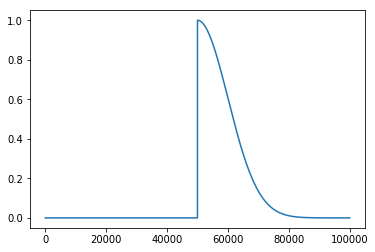

In [18]:
w = signal.windows.gaussian(10/dt, 1/dt)
max_ind = w.argmax()
w[0:max_ind] = 0
plt.plot(w);

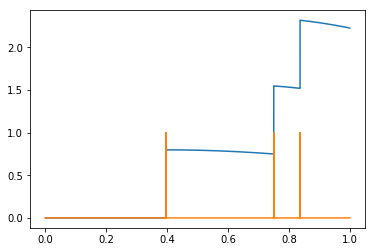

In [19]:
filtered = signal.convolve(new, w, mode='same') / (sum(w)*dt)
plot_len = 10000
plt.plot(t[0:plot_len],filtered[0:plot_len])
plt.plot(t[0:plot_len],new[0:plot_len])

In [ ]:
filtered = signal.convolve(new, w, mode='same') / (sum(w)*dt)
plt.plot(t[0:plot_len],filtered[0:)
plt.plot(t[0:plot_len],new[0:plot_len])

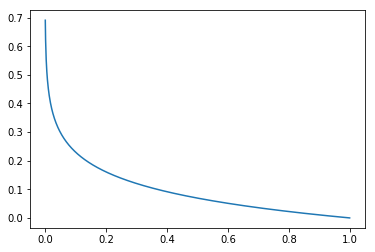

In [8]:
a = np.arange(0.001, 1, 0.001)
r = 10
b = -np.log(a)/r
plt.plot(a,b)

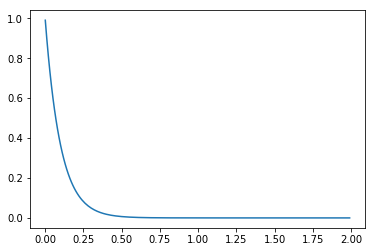

In [9]:
a = np.arange(0.001, 2, 0.01)
r = 10
b = np.exp(-r * a)
plt.plot(a,b)